In [29]:
import numpy as np

In [30]:
stock_list = [100, 98, 95, 96, 99, 102, 103, 105, 105, 108]

In [31]:
stock_array = np.array(stock_list)
(stock_array[1:]/stock_array[:-1] - 1).reshape(-1, 1)

array([[-0.02      ],
       [-0.03061224],
       [ 0.01052632],
       [ 0.03125   ],
       [ 0.03030303],
       [ 0.00980392],
       [ 0.01941748],
       [ 0.        ],
       [ 0.02857143]])

In [32]:
import pandas as pd 
stock_df = pd.DataFrame(stock_list, columns = ['price'])

In [33]:
stock_df

,price
0,100
1,98
2,95
3,96
4,99
5,102
6,103
7,105
8,105
9,108


In [34]:
stock_df['prev_price'] = stock_df.shift()

In [35]:
stock_df

,price,prev_price
0,100,NaN
1,98,100.0
2,95,98.0
3,96,95.0
4,99,96.0
5,102,99.0
6,103,102.0
7,105,103.0
8,105,105.0
9,108,105.0


In [36]:
stock_df['daily_return'] = stock_df['price']/stock_df['prev_price'] - 1
stock_df

,price,prev_price,daily_return
0,100,NaN,NaN
1,98,100.0,-0.020000
2,95,98.0,-0.030612
3,96,95.0,0.010526
4,99,96.0,0.031250
5,102,99.0,0.030303
6,103,102.0,0.009804
7,105,103.0,0.019417
8,105,105.0,0.000000
9,108,105.0,0.028571


In [38]:
stock_df['expand_mean'] = stock_df['daily_return'].expanding().mean()
stock_df    

,price,prev_price,daily_return,expand_mean
0,100,NaN,NaN,NaN
1,98,100.0,-0.020000,-0.020000
2,95,98.0,-0.030612,-0.025306
3,96,95.0,0.010526,-0.013362
4,99,96.0,0.031250,-0.002209
5,102,99.0,0.030303,0.004293
6,103,102.0,0.009804,0.005212
7,105,103.0,0.019417,0.007241
8,105,105.0,0.000000,0.006336
9,108,105.0,0.028571,0.008807


In [39]:
stock_df['roll_mean_3']  = stock_df['daily_return'].rolling(3).mean()

In [40]:
stock_df

,price,prev_price,daily_return,expand_mean,roll_mean_3
0,100,NaN,NaN,NaN,NaN
1,98,100.0,-0.020000,-0.020000,NaN
2,95,98.0,-0.030612,-0.025306,NaN
3,96,95.0,0.010526,-0.013362,-0.013362
4,99,96.0,0.031250,-0.002209,0.003721
5,102,99.0,0.030303,0.004293,0.024026
6,103,102.0,0.009804,0.005212,0.023786
7,105,103.0,0.019417,0.007241,0.019841
8,105,105.0,0.000000,0.006336,0.009740
9,108,105.0,0.028571,0.008807,0.015996


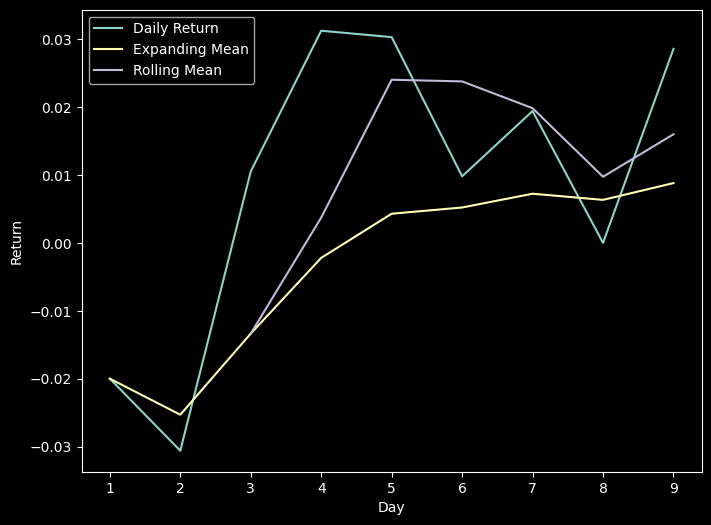

In [41]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(8,6))
plt.plot(stock_df['daily_return'], label = 'Daily Return')
plt.plot(stock_df['expand_mean'], label = 'Expanding Mean')
plt.plot(stock_df['roll_mean_3'], label = 'Rolling Mean')
plt.xlabel('Day')
plt.ylabel('Return')
plt.legend()
plt.show()


In [42]:
stock_df['positive'] = stock_df['daily_return'].apply(lambda x: 1 if x > 0 else 0)
stock_df

,price,prev_price,daily_return,expand_mean,roll_mean_3,positive
0,100,NaN,NaN,NaN,NaN,0
1,98,100.0,-0.020000,-0.020000,NaN,0
2,95,98.0,-0.030612,-0.025306,NaN,0
3,96,95.0,0.010526,-0.013362,-0.013362,1
4,99,96.0,0.031250,-0.002209,0.003721,1
5,102,99.0,0.030303,0.004293,0.024026,1
6,103,102.0,0.009804,0.005212,0.023786,1
7,105,103.0,0.019417,0.007241,0.019841,1
8,105,105.0,0.000000,0.006336,0.009740,0
9,108,105.0,0.028571,0.008807,0.015996,1


In [43]:
stock_df['num_positive'] = stock_df['positive'].expanding().sum()
stock_df

,price,prev_price,daily_return,expand_mean,roll_mean_3,positive,num_positive
0,100,NaN,NaN,NaN,NaN,0,0.0
1,98,100.0,-0.020000,-0.020000,NaN,0,0.0
2,95,98.0,-0.030612,-0.025306,NaN,0,0.0
3,96,95.0,0.010526,-0.013362,-0.013362,1,1.0
4,99,96.0,0.031250,-0.002209,0.003721,1,2.0
5,102,99.0,0.030303,0.004293,0.024026,1,3.0
6,103,102.0,0.009804,0.005212,0.023786,1,4.0
7,105,103.0,0.019417,0.007241,0.019841,1,5.0
8,105,105.0,0.000000,0.006336,0.009740,0,5.0
9,108,105.0,0.028571,0.008807,0.015996,1,6.0


In [45]:
import pandas as pd 
df = pd.read_csv('ADANIPORTS.csv')

target_col_df = pd.to_numeric(df['High'])
df['average_low'] = target_col_df.rolling(3).mean()
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,average_low
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619,0.3612,NaN
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278,0.3172,NaN
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678,0.2088,984.916667
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913,0.2735,954.250000
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741,955.916667


In [46]:
df['sum_of_prev_2_day_high_price'] = target_col_df.rolling(window=2).sum()

In [47]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,average_low,sum_of_prev_2_day_high_price
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619,0.3612,NaN,NaN
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278,0.3172,NaN,2040.00
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678,0.2088,984.916667,1904.75
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913,0.2735,954.250000,1872.75
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741,955.916667,1953.00


In [48]:
def sub_t(x):
    return x - x.index

target_col_df = pd.to_numeric(df["Open"])
df["Raw"] = target_col_df.rolling(window=1).apply(sub_t)
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,average_low,sum_of_prev_2_day_high_price,Raw
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619,0.3612,NaN,NaN,770.00
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278,0.3172,NaN,2040.00,983.00
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678,0.2088,984.916667,1904.75,907.00
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913,0.2735,954.250000,1872.75,887.00
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741,955.916667,1953.00,935.75


In [51]:
df['Weighted_Mean'] = target_col_df.rolling(window=4, center= True, win_type="triang").mean()
df[['Open', 'Weighted_Mean']].head(10)

,Open,Weighted_Mean
0,770.00,NaN
1,984.00,NaN
2,909.00,917.37500
3,890.00,915.09375
4,939.75,922.90625
5,985.00,965.65625
6,1061.00,1020.84375
7,1089.00,1066.87500
8,1100.00,1092.25000
9,1110.00,1100.00000
